# Import thư viện

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Tổng quan về tập dữ liệu

In [13]:
resolved_file_path = "../data/resolved_data/bank-additional-full.csv"
df = pd.read_csv("../data/root_data/bank-additional-full.csv", sep=';')
print("Kích thước dữ liệu:", df.shape)

Kích thước dữ liệu: (41188, 21)


In [14]:
df.info()

# Danh sách các cột
print("\n======================================================")
print("Danh sách các cột:\n", list(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

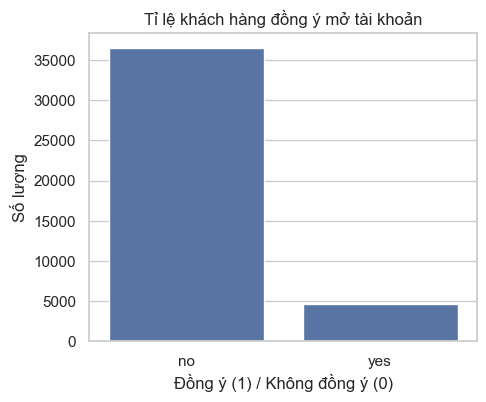

In [15]:
sns.set_theme(style="whitegrid")

# 1️⃣ Tỉ lệ khách hàng đồng ý mở tài khoản
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='y')
plt.title("Tỉ lệ khách hàng đồng ý mở tài khoản")
plt.xlabel("Đồng ý (1) / Không đồng ý (0)")
plt.ylabel("Số lượng")
plt.show()

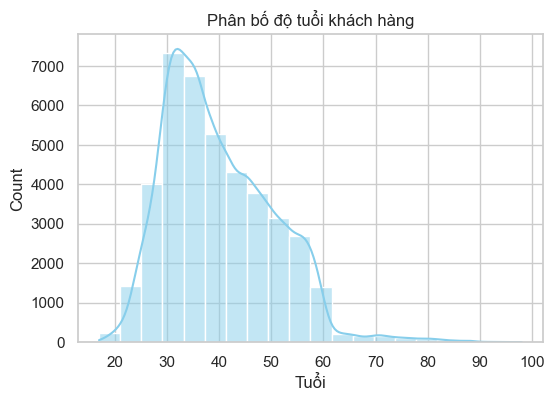

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Phân bố độ tuổi khách hàng")
plt.xlabel("Tuổi")
plt.show()

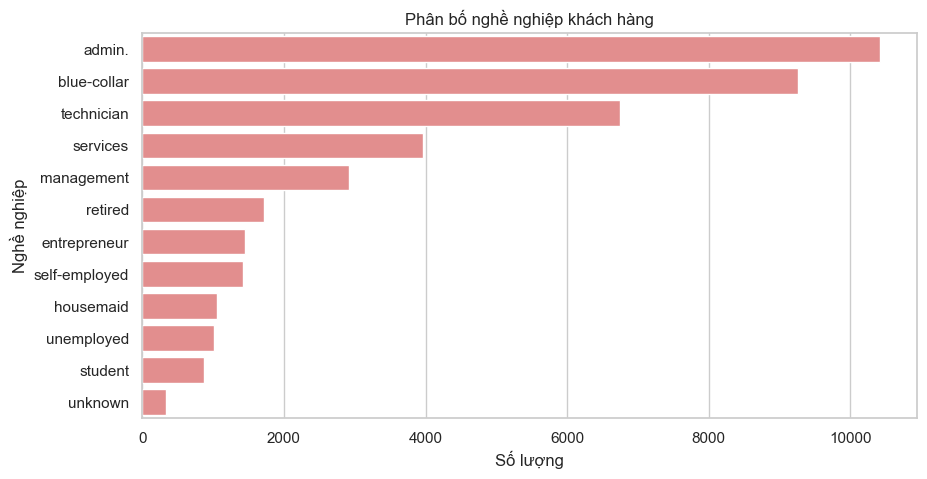

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='job', order=df['job'].value_counts().index, color='lightcoral')
plt.title("Phân bố nghề nghiệp khách hàng")
plt.xlabel("Số lượng")
plt.ylabel("Nghề nghiệp")
plt.show()

In [18]:
# Số lượng giá trị unknown trên mỗi cột
(df == 'unknown').sum().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

# Tiền xử lý dữ liệu

In [19]:
df = df.drop(columns=['duration'])

unknown_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in unknown_cols:
    df[col] = df[col].replace('unknown', 'Unknown')

binary_cols = ['default', 'housing', 'loan', 'y']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'Unknown': -1})

In [20]:
cat_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Đã mã hóa các cột:", list(cat_cols))

Đã mã hóa các cột: ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']


In [21]:
# Xuất ra CSV
df.to_csv(resolved_file_path, index=False, sep=';')

print(f"✅ Dữ liệu đã xử lý được lưu tại: {resolved_file_path}")

✅ Dữ liệu đã xử lý được lưu tại: ../data/resolved_data/bank-additional-full.csv
